In [1]:
# Steps to solve Emergency vs Non-Emergency vehicle classification problem using Batch Normalization

'''
<ol>1. Loading the dataset</ol>
<ol>2. Pre-processing the data</ol>
<ol>3. Creating training and validation set</ol>
<ol>4. Defining the model architecture</ol>
<ol> <ol>* Adding batch normalization layer(s) </ol></ol>
<ol>5. Compiling the model</ol>
<ol>6. Training the model</ol>
<ol>7. Evaluating model performance</ol>
'''

'\n<ol>1. Loading the dataset</ol>\n<ol>2. Pre-processing the data</ol>\n<ol>3. Creating training and validation set</ol>\n<ol>4. Defining the model architecture</ol>\n<ol> <ol>* Adding batch normalization layer(s) </ol></ol>\n<ol>5. Compiling the model</ol>\n<ol>6. Training the model</ol>\n<ol>7. Evaluating model performance</ol>\n'

In [2]:
## 1. Loading the dataset
# import necessary libraries and functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# importing layers from keras
from keras.layers import Dense, InputLayer
from keras.models import Sequential
# importing adam optimizer from keras optimizer module 
from keras.optimizers import Adam

# train_test_split to create training and validation set
from sklearn.model_selection import train_test_split
# accuracy_score to calculate the accuracy of predictions
from sklearn.metrics import accuracy_score


In [3]:
# reading the csv file
data = pd.read_csv('../data/Dataset/emergency_classification.csv')

# create random number generator
seed = 42

# load images and store it in numpy array

# empty list to store the images
X = []
# iterating over each image
for img_name in data.image_names:
    # loading the image using its name
    img = plt.imread('../data/Dataset/images/' + img_name)
    # saving each image in the list
    X.append(img)
    
# converting the list of images into array
X=np.array(X)

# storing the target variable in separate variable
y = data.emergency_or_not.values

## 2. Pre-processing the data
# converting 3 dimensional image to 1 dimensional image
X = X.reshape(X.shape[0], 224*224*3)

print(X.shape)
# normalizing the pixel values
X = X / X.max()

# minimum and maximum pixel values of images after normalizing
X.min(), X.max()

print(X.min(), X.max())


(2352, 150528)
0.0 1.0


In [4]:
## 3. Creating training and validation set
# creating a training and validation set
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.3, random_state=seed)

# shape of training and validation set
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)

print((X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape))


((1646, 150528), (1646,)) ((706, 150528), (706,))


In [5]:
## 4. Defining the model architecture

### <ol>Without Batch Normalization</ol>

# defining the model architecture
model=Sequential()

model.add(InputLayer(input_shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               15052900  
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15063101 (57.46 MB)
Trainable params: 15063101 (57.46 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2024-02-04 14:41:51.210035: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-02-04 14:41:51.210057: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-02-04 14:41:51.210065: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-02-04 14:41:51.210094: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-04 14:41:51.210115: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
## 5. Compiling the model
# defining the adam optimizer and setting the learning rate as 10^-5
adam = Adam(learning_rate=1e-5)

# compiling the model

# defining loss as binary crossentropy
# defining optimizer as Adam
# defining metrics as accuracy

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])



Epoch 1/50


2024-02-04 14:41:54.042333: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2024-02-04 14:41:54.072354: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


13/13 [==============================] - 3s 173ms/step - loss: 0.6605 - accuracy: 0.5996 - val_loss: 0.6447 - val_accuracy: 0.6133
Epoch 2/50
13/13 [==============================] - 1s 80ms/step - loss: 0.6326 - accuracy: 0.6440 - val_loss: 0.6337 - val_accuracy: 0.6402
Epoch 3/50
13/13 [==============================] - 1s 73ms/step - loss: 0.6178 - accuracy: 0.6707 - val_loss: 0.6173 - val_accuracy: 0.6657
Epoch 4/50
13/13 [==============================] - 1s 76ms/step - loss: 0.6064 - accuracy: 0.6938 - val_loss: 0.6114 - val_accuracy: 0.6686
Epoch 5/50
13/13 [==============================] - 1s 74ms/step - loss: 0.6011 - accuracy: 0.6993 - val_loss: 0.6161 - val_accuracy: 0.6657
Epoch 6/50
13/13 [==============================] - 1s 75ms/step - loss: 0.5899 - accuracy: 0.7145 - val_loss: 0.5987 - val_accuracy: 0.6813
Epoch 7/50
13/13 [==============================] - 1s 73ms/step - loss: 0.5840 - accuracy: 0.7278 - val_loss: 0.5977 - val_accuracy: 0.6756
Epoch 8/50
13/13 [=====

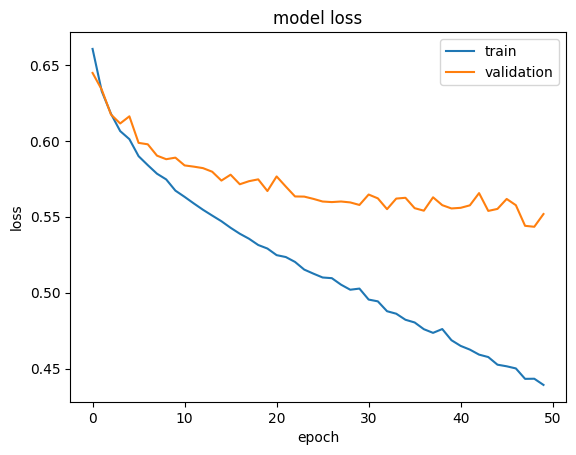

In [7]:

## 6. Training the model
# training the model for 50 epochs

model_history = model.fit(X_train, y_train, epochs=50, batch_size=128,validation_data=(X_valid,y_valid))

## 7. Evaluating model performance 

from sklearn.metrics import accuracy_score

# Use the model.predict method to get the predicted probabilities
predicted_probabilities = model.predict(X_valid)

# Convert probabilities to class labels; assume binary classification with a threshold of 0.5
predicted_labels = (predicted_probabilities > 0.5).astype('int32')

# Calculate accuracy on the validation set
accuracy = accuracy_score(y_valid, predicted_labels)
print('Accuracy on validation set:', accuracy * 100, '%')

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [ ]:
## Defining the model architecture

### <ol>With Batch Normalization</ol>

# importing batch normalization layer
from keras.layers import BatchNormalization
# defining the model architecture and adding batch normalization layers
model=Sequential()

model.add(InputLayer(input_shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dense(units=1, activation='sigmoid'))

model.summary()

## Compiling the model
# compiling the model

# defining loss as binary crossentropy
# defining optimizer as Adam
# defining metrics as accuracy

model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

## Training the model
# training the model for 50 epochs using Batch Normalization

model_history = model.fit(X_train, y_train, epochs=200, batch_size=128,validation_data=(X_valid,y_valid))

## 7. Evaluating model performance 

from sklearn.metrics import accuracy_score

# Use the model.predict method to get the predicted probabilities
predicted_probabilities = model.predict(X_valid)

# Convert probabilities to class labels; assume binary classification with a threshold of 0.5
predicted_labels = (predicted_probabilities > 0.5).astype('int32')

# Calculate accuracy on the validation set
accuracy = accuracy_score(y_valid, predicted_labels)
print('Accuracy on validation set:', accuracy * 100, '%')


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               15052900  
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 batch_normalization (Batch  (None, 100)               400       
 Normalization)                                                  
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15063501 (57.46 MB)
Trainable params: 15063301 (57.46 MB)
Non-trainable params: 200 (800.00 Byte)
_________________________________________________________________


Epoch 1/200
